In [102]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
# from cnn_utils import *
# from test_utils import summary, comparator

%matplotlib inline

In [142]:
num = 100 

X_train = np.zeros((num, 1))
Y_train = np.zeros((num, 1))

X = np.linspace(-6, 6, num)

for i in range(X_train.shape[0]):
    X_train[i,0] = X[i]
    Y_train[i,0] = np.sin(X[i])

print ("number of training examples = " + str(X_train.shape[0]))
# print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
# print ("X_test shape: " + str(X_test.shape))
# print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 100
X_train shape: (100, 1)
Y_train shape: (100, 1)


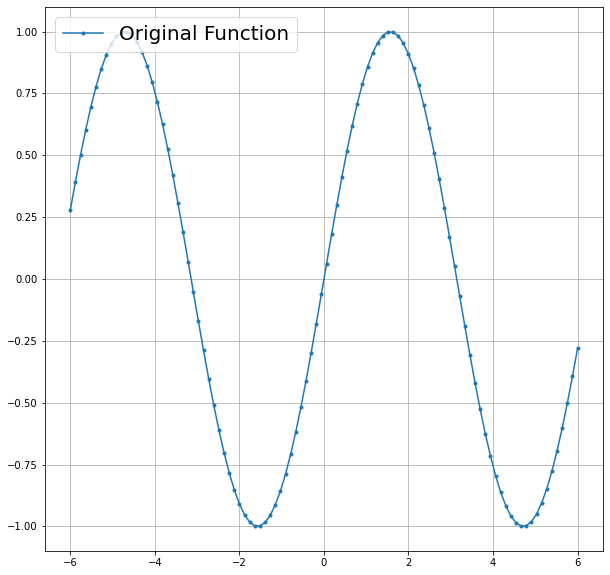

In [144]:

plt.figure(figsize=(10,10))

plt.plot(X_train, Y_train,'.-' ,label="Original Function")
plt.grid('on')
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [161]:
model = tf.keras.Sequential([ tf.keras.layers.Dense(32, activation='relu'), 
tf.keras.layers.Dense(32, activation='relu'), 
tf.keras.layers.Dense(10, activation='linear'), 
tf.keras.layers.Dense(1, activation='linear') ])

In [162]:
model.compile(optimizer='adam', loss="mse", metrics=["mse"])

In [163]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=40)

===] - 0s 3ms/step - loss: 0.0051 - mse: 0.0051
Epoch 791/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0054 - mse: 0.0054
Epoch 792/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0064 - mse: 0.0064
Epoch 793/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 794/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0057 - mse: 0.0057
Epoch 795/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0055 - mse: 0.0055
Epoch 796/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053
Epoch 797/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0053 - mse: 0.0053
Epoch 798/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0050 - mse: 0.0050
Epoch 799/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0053 - mse: 0.0053
Epoch 800/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0061 - mse: 0.0061
Ep

dict_keys(['loss', 'mse'])


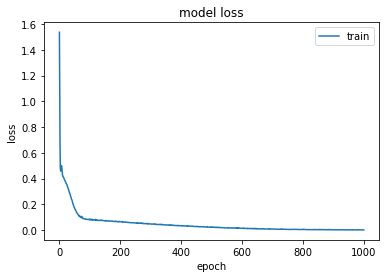

In [164]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

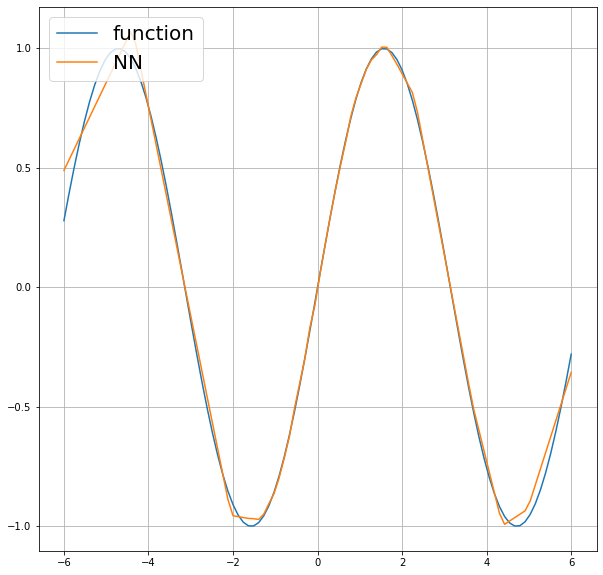

In [165]:
y_model = np.zeros((num, 1))
for i in range(num):
    y_model[i,0] = model.call( tf.constant([X_train[i,0]]) )

plt.figure(figsize=(10,10))

plt.plot(X_train, Y_train, label="function")
plt.plot(X_train, y_model, label="NN")
plt.grid('on')
plt.legend(loc=2, prop={'size': 20})
plt.show()